# 구글 마운트 및 패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Python 패키지 설치
!pip install torch>=1.5 opencv-python>=4.0 scipy>=1.4.0 h5py>=2.10 pillow>=7.0.0 imageio>=1.18 timm==0.1.30

In [ ]:
!pip install --upgrade timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 0.1.30
    Uninstalling timm-0.1.30:
      Successfully uninstalled timm-0.1.30


In [ ]:
!pip install nni

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
  Attempting uninstall: filelock
    Found existing installation: filelock 3.16.1
    Uninstalling filelock-3.16.1:
      Successfully uninstalled filelock-3.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.26.4 requires filelock>=3.15, but you have filelock 3.11.0 which is incompatible.


# gt_density_map 만드는 코드 -> 이미 실행 후 만들었기에 재 실행 X !!!!

In [ ]:
os.chdir('/content/drive/MyDrive/심신개/TransCrowd/data')
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/MyDrive/심신개/TransCrowd/data


In [ ]:
!python predataset_qnrf.py

/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0001.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0002.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0003.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0004.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0005.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0006.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0007.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0008.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/Test/img_0009.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0009.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0010.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0011.jpg
/content/drive/MyDrive/심신개/UCF-QNRF_ECCV18/test_data/images_crop/img_0012.jpg
/co

# Train_list / Test_list 설정 -> 실행해야함 !

In [ ]:
import os
os.chdir('/content/drive/MyDrive/심신개/TransCrowd')

In [ ]:
!python make_npydata.py

Generate UCF-QNRF image list successfully 7206 334


# Train

-- batch_size | default = 8

-- weight_decay | default = 5 * 1e-4

-- momentum | default = 0.95

-- epochs | default = 20000

-- seed | default = 1

-- best_pred | default = 1e5

-- gpu_id | default = '0'



-- lr | default = 1e-5

-- model_type | default = 'token' | vs 'gap' -> 논문에서는 gap이 더욱 성능이 높게 나옴

-- gap: Global Average Pooling

In [ ]:
import torch
print(torch.cuda.is_available())  # True가 출력되어야 GPU 사용 가능
print(torch.cuda.device_count())  # 사용 가능한 GPU의 개수
print(torch.cuda.current_device())  # 현재 사용 중인 GPU의 ID
print(torch.cuda.get_device_name(0))  # GPU 이름 출력

True
1
0
NVIDIA A100-SXM4-40GB


In [ ]:
# validate에서 shuffle = False로 설정되어 있음
# epoch = 200~250사이면 적당할 듯 200 이후로부터는 거의 학습 진전 X (MAE MSE)

In [ ]:
!python /content/drive/MyDrive/심신개/TransCrowd/train.py --dataset UCF_QNRF --start_epoch 1 --gpu_id 0 --epochs 200 --batch_size 8 --model_type gap --weight_decay 1e-4 --lr 1e-5

/usr/local/lib/python3.10/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
{'dataset': 'UCF_QNRF', 'save_path': './save_file/A_baseline', 'workers': 16, 'print_freq': 200, 'start_epoch': 1, 'test_dataset': 'UCF_QNRF', 'pre': None, 'batch_size': 8, 'weight_decay': 0.0001, 'momentum': 0.95, 'epochs': 200, 'seed': 1, 'best_pred': 100000.0, 'gpu_id': '0', 'lr': 1e-05, 'model_type': 'gap'}
load transformer pretrained
None
./save_file/A_baseline
100000.0 1
Pre_load dataset ......
Pre_load dataset ......
epoch 1, processed 7206 samp

가장 먼저, 논문의 서론 부분에 CNN의 한계점을 짚으며 TransCrowd를 소개하여 그에 따라 BackBone보다는 하이퍼파라미터 조정에 더욱 초점을 맞추었습니다.

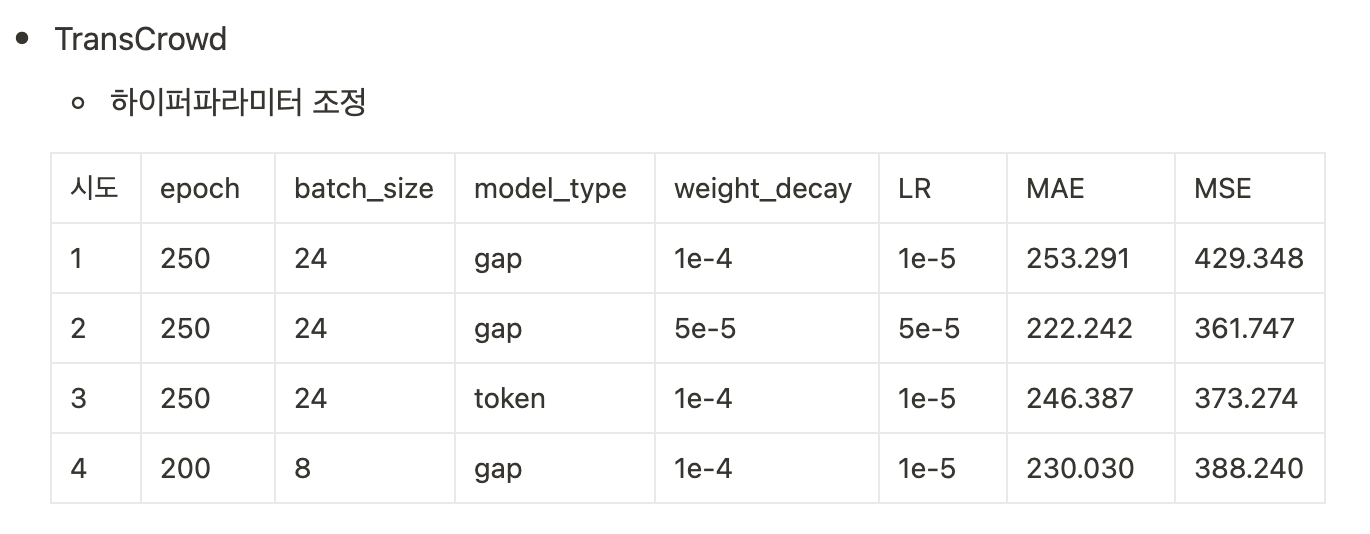

위의 4번의 시도 뿐만 아니라 훨씬 더 많은 수행을 하였지만, 매번 관찰하며 학습 진전의 가능성이 없을 경우에는 빠르게 조정하며 수행하였습니다.

발표에서도 언급하였듯, 해당 모델의 경우 Transformer를 기반으로 수행하며, Vision Transformer는 대규모 데이터셋에서 일반적으로 좋은 성능을 보이는 반면 현재 task의 경우 1500개 내외의 이미지가 학습데이터이기에 성능 측면에서 한계가 보였습니다.